# DIAMONDS PRICE PREDICTION - Stefano Benetti (4905781)

### Importing libraries

In [132]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import svm
import math

#### Let's take a look at the dataset

* Carat : Carat weight of the Diamond.
* Cut : Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* Color : Color of the Diamond. With D being the best and J the worst.
* Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* Price : the Price of the Diamond.
* X : Length of the Diamond in mm.
* Y : Width of the Diamond in mm.
* Z : Height of the Diamond in mm.
________________________________________________________________________
* Qualitative Features (Categorical) : Cut, Color, Clarity.

* Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

## Exploratory Data Analysis

In [133]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [134]:
print(diamonds.describe())
print(diamonds.info())
print(diamonds.shape)

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

To do: 
* drop "Unnamed" since is not useful for our purpose
* drop obs. with x, y or z equal to zero, because they could be typos

In [136]:
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [137]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [138]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

20

In [139]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

## Dealing with outliers

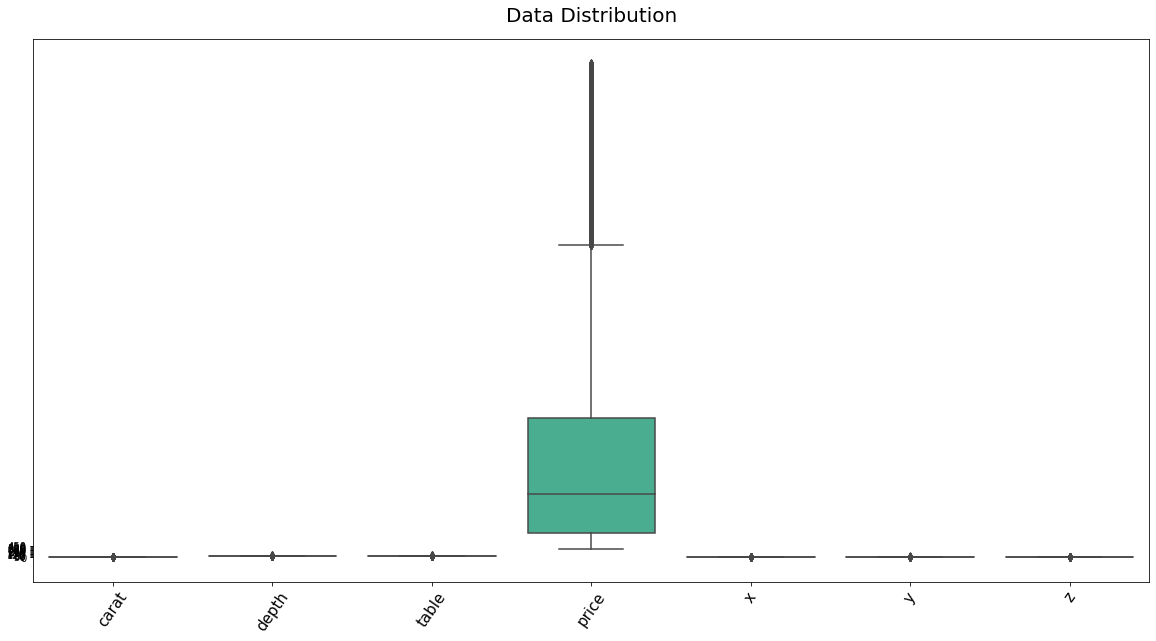

In [140]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

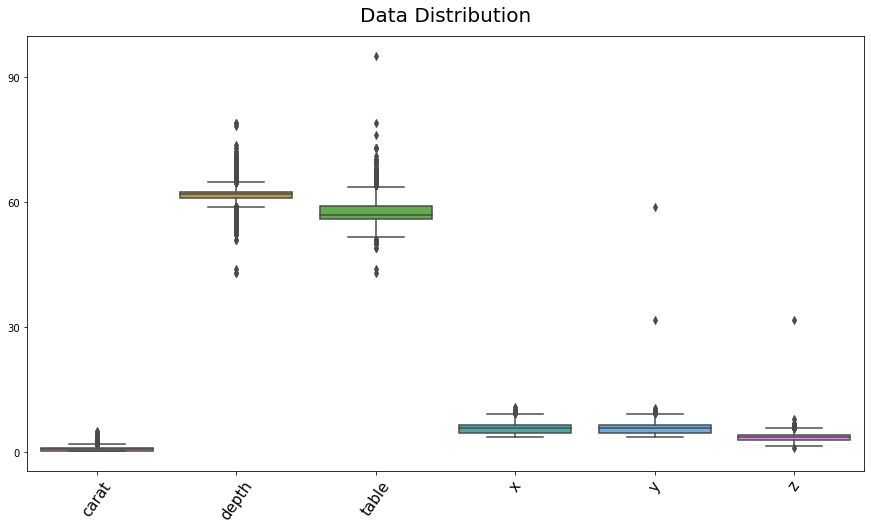

In [141]:
subset = diamonds.drop(['price'], axis=1)

plt.figure(figsize=(15,8))
sns.boxplot(data=subset)
plt.yticks(range(0,120,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

As we can see we have some outliers for the variable 
* table
* y 
* z
* depth

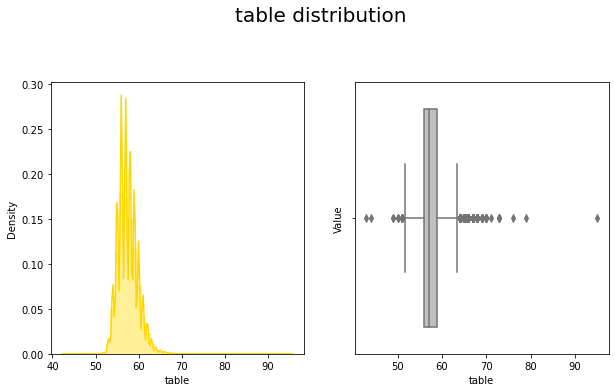

In [142]:
data=diamonds['table']
label='table'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0], color = 'gold')
sns.boxplot(data, orient='v',ax=axs[1], color = "silver")
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

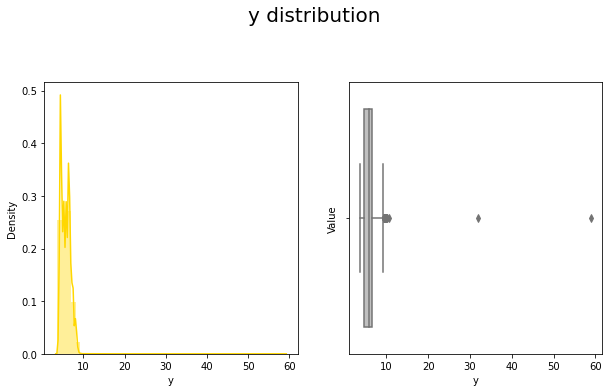

In [143]:
data=diamonds['y']
label='y'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0], color = 'gold')
sns.boxplot(data, orient='v',ax=axs[1], color = "silver")
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

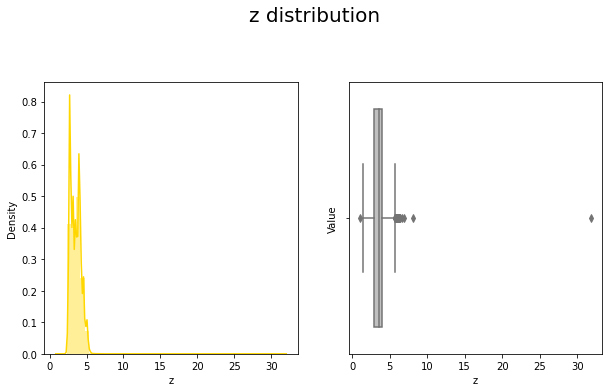

In [144]:
data=diamonds['z']
label='z'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0], color = 'gold')
sns.boxplot(data, orient='v',ax=axs[1], color = "silver")
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

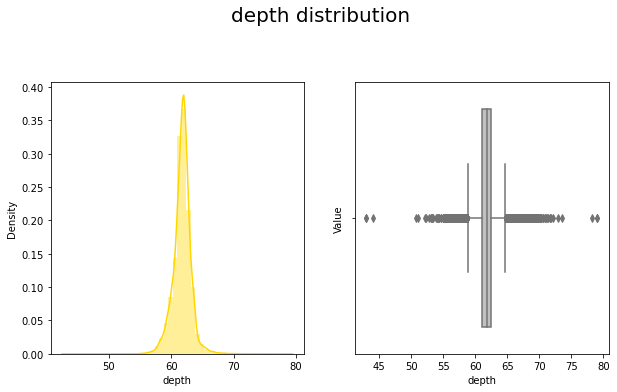

In [145]:
data=diamonds['depth']
label='depth'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0], color = 'gold')
sns.boxplot(data, orient='v',ax=axs[1], color = "silver")
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

Getting rid of outliers

In [146]:
diamonds = diamonds.drop(diamonds[diamonds["table"]>80].index)
diamonds = diamonds.drop(diamonds[diamonds['table']<45].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]>30].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]>10].index)
diamonds = diamonds.drop(diamonds[diamonds["depth"]>75].index)
diamonds = diamonds.drop(diamonds[diamonds['depth']<50].index)
diamonds.shape

(53908, 10)

<AxesSubplot:xlabel='depth', ylabel='Density'>

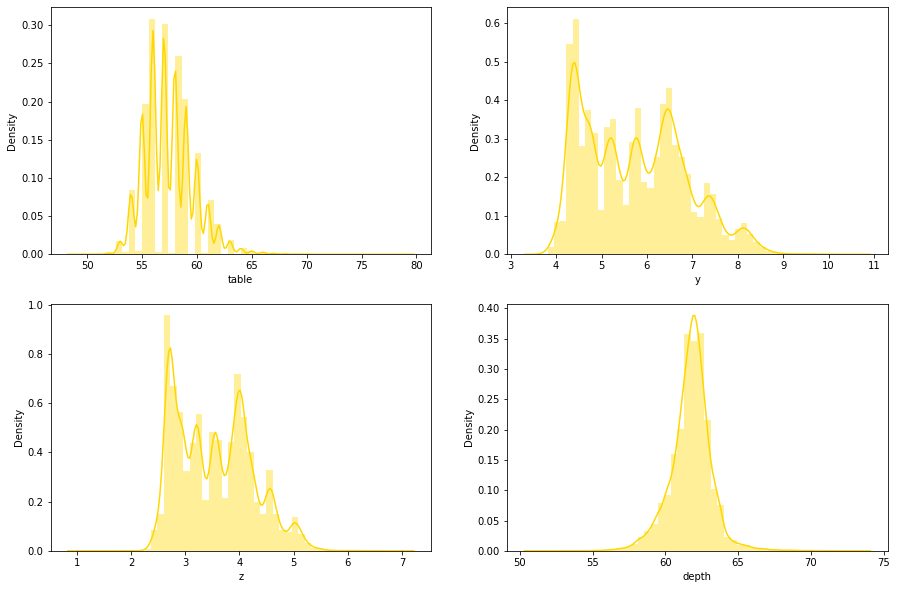

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(diamonds['table'], ax = axes[0,0], color = 'gold',axlabel = 'table')
sns.distplot(diamonds['y'], ax = axes[0,1], color = 'gold',axlabel = 'y')
sns.distplot(diamonds['z'], ax = axes[1,0], color = 'gold',axlabel = 'z')
sns.distplot(diamonds['depth'], ax = axes[1,1], color = 'gold',axlabel = 'depth')

<AxesSubplot:>

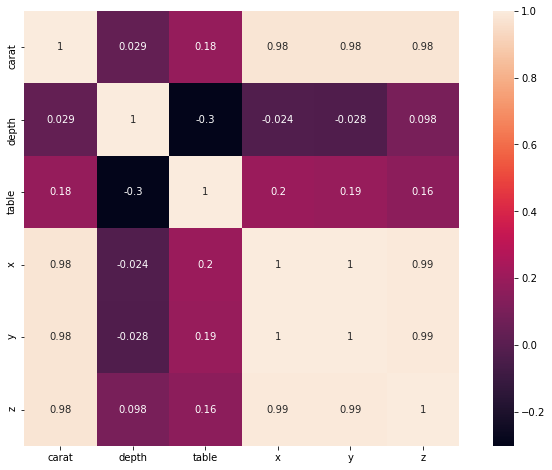

In [148]:
diamonds_cm = diamonds.drop(diamonds[['price']], axis = 1)
corr = diamonds_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Firstly, we can see that the dimensional variables (x,y,z) are highly correlated. It does make sense, since they represents diamonds length, width and height. We can notice that they could be related to the diamonds volume. So, we can use the common volume formula in order to create an unique variable that explains the diamonds dimension.
_________________________________________________________________________________________________________________________
Moreover, the variable carat and volume are extremely correlated too

In [149]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.drop(diamonds[['x','y','z']], axis = 1, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


<AxesSubplot:>

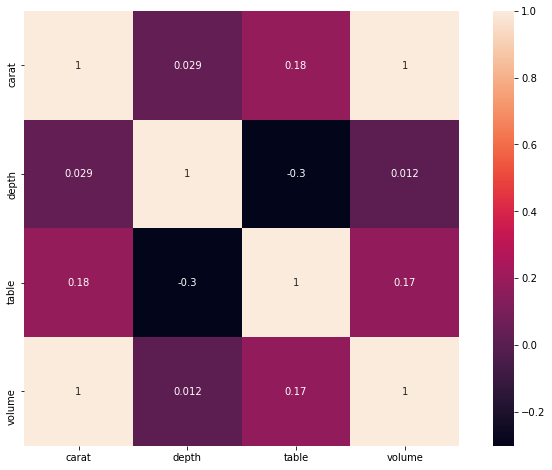

In [150]:
diamonds_cm = diamonds.drop(diamonds[['price']], axis = 1)
corr = diamonds_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

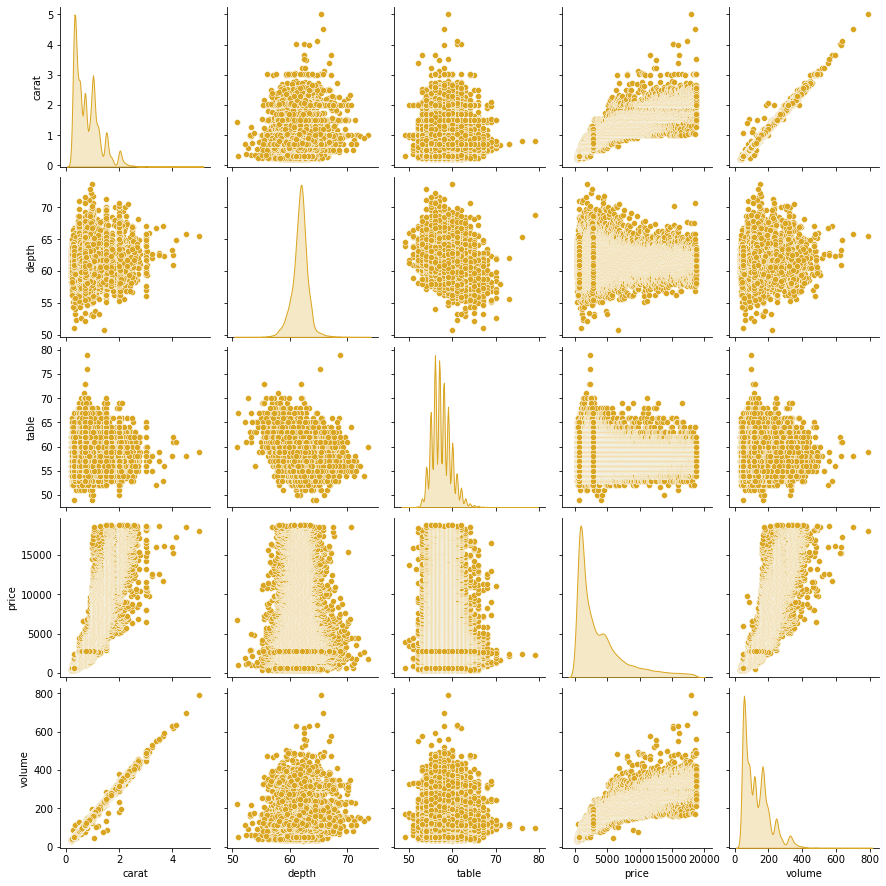

In [151]:
colors = ['goldenrod']
sns.set_palette(sns.color_palette(colors))
sns.pairplot(diamonds,diag_kind = 'kde')

Text(0, 0.5, 'Price')

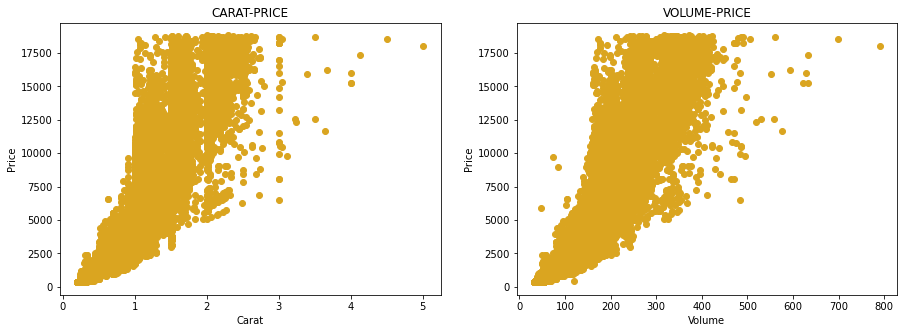

In [152]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(diamonds["carat"], diamonds["price"])
ax2.scatter(diamonds["volume"], diamonds["price"])

ax1.set_title('CARAT-PRICE')
ax1.set_xlabel('Carat')
ax1.set_ylabel('Price')

ax2.set_title('VOLUME-PRICE')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Price')

Text(0, 0.5, 'Volume')

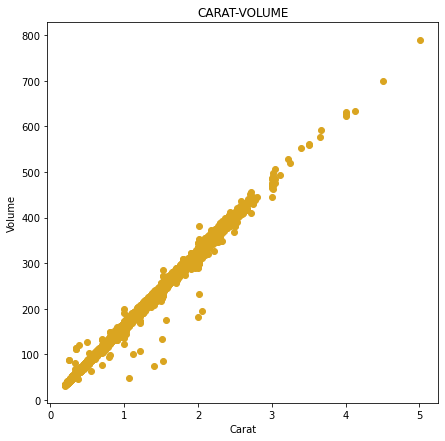

In [153]:
plt.figure(figsize = (7,7))
plt.scatter(diamonds["carat"], diamonds["volume"])
plt.title('CARAT-VOLUME')
plt.xlabel('Carat')
plt.ylabel('Volume')

As we can see, the correlation among volume and carat variables is the maximum one. Moreover, the price is quite exponentially influenced by the carat and so the volume. 

Let's have a look to the categorical variable instead. 

<AxesSubplot:xlabel='clarity', ylabel='price'>

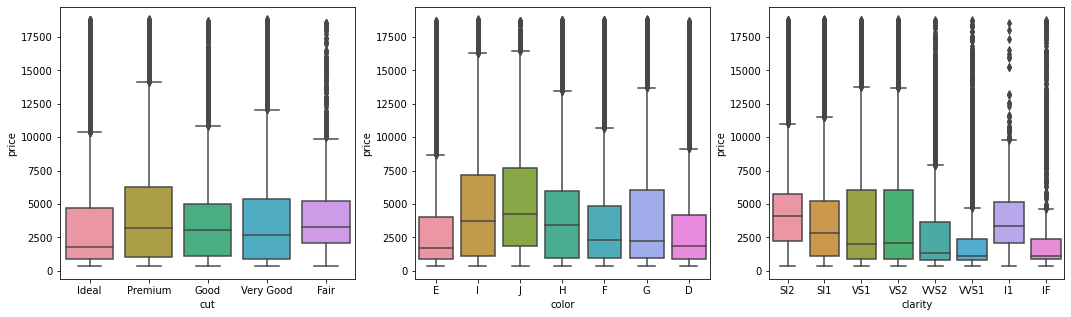

In [154]:
cat_variables = diamonds[['cut','color','clarity','price']]
colors = ['firebrick']
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(ax = axes[0], data=cat_variables,y='price',x='cut')
sns.boxplot(ax = axes[1], data=cat_variables,y='price',x='color')
sns.boxplot(ax = axes[2], data=cat_variables,y='price',x='clarity')

Apart from the colour, in the variable "clarity" and "cut", we notice particular behaviours with respect to the price of the diamond: although we could give a qualitative order to the two variables, the price is not influenced by this order. This does not mean that the two variables do not affect the response variable, simply that a higher level of one of them does not correspond to a higher price. 
For this reason it is not possible to treat them as "numerical" but as real categorical variables.

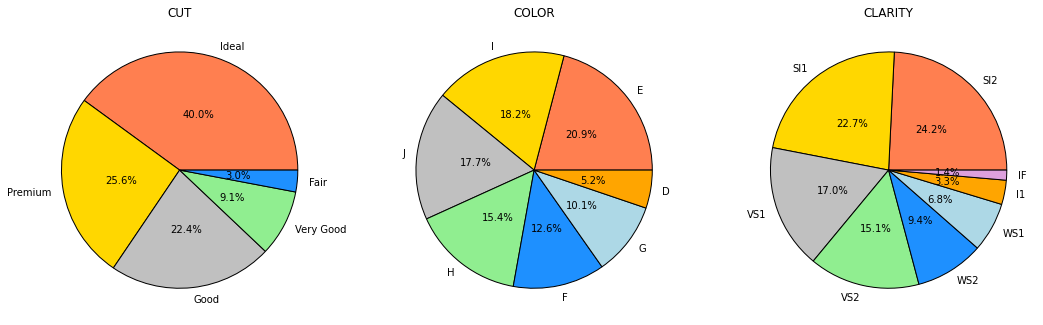

In [155]:
CUT = diamonds['cut'].value_counts()
COL = diamonds['color'].value_counts()
CL = diamonds['clarity'].value_counts()

labels_cut = ['Ideal','Premium','Good','Very Good','Fair']

labels_col = ['E','I','J','H','F','G','D']

labels_cl = ['SI2','SI1','VS1','VS2','WS2','WS1','I1','IF']


fig , ax = plt.subplots(nrows = 1, ncols = 3, figsize=(18,10))

ax[0].set_title("CUT")
ax[0].pie(x=CUT, autopct="%.1f%%", labels=labels_cut, 
             colors=['coral','gold','silver','lightgreen','dodgerblue'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)

ax[1].set_title("COLOR")
ax[1].pie(x=COL, autopct="%.1f%%", labels=labels_col, 
             colors=['coral','gold','silver','lightgreen','dodgerblue','lightblue','orange'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)

ax[2].set_title("CLARITY")
ax[2].pie(x=CL, autopct="%.1f%%", labels=labels_cl, 
             colors=['coral','gold','silver','lightgreen','dodgerblue','lightblue','orange','plum'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)
plt.show()

In [156]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### Preparing the data 

Features

In [157]:
diamonds_reg = pd.get_dummies(diamonds)
diamonds_reg.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [158]:
from sklearn.model_selection import train_test_split
X = diamonds_reg.drop(['price','volume'], axis=1)
Y = diamonds_reg['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=66)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (43126, 23)
X_test: (10782, 23)
Y_train: (43126,)
Y_test: (10782,)


In [159]:
X_train.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43036,0.55,61.8,55.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
34183,0.33,61.6,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25678,2.04,59.8,59.0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
44016,0.51,62.9,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37464,0.42,61.4,56.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Linear Regression

In [160]:
import statsmodels.api as sm
X_train_lr= sm.add_constant(X_train)
X_test_lr = sm.add_constant(X_test)
lin_reg = sm.OLS(Y_train, X_train_lr).fit()
pred_lr = lin_reg.predict(X_test_lr)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.350e+04
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:32:02   Log-Likelihood:            -3.6525e+05
No. Observations:               43126   AIC:                         7.305e+05
Df Residuals:                   43105   BIC:                         7.307e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -441.7348    278.354     -1.587      0.113    -987.314     103.845
carat          8897.2691     13.519    658.150      0.000    8870.772    8923.766
depth           -26.8593      4.619     -5.814      0.000     -35.913     -17.805
table           -24.0707      3.356     -7.173      0.000     -30.648     -17.493
cut_Fair       -674.7161     70.825     -9.526      0.000    -813.535    -535.897
cut_Good        -97.9362     60.033     -1.631      0.103    -215.601      19.729
cut_Ideal       170.5075     49.522      3.443      0.001      73.444     267.571
cut_Premium      90.2033     54.645      1.651      0.099     -16.902     197.309
cut_Very Good    70.2067     55.073      1.275      0.202     -37.738     178.152
color_D         767.0990     42.185     18.184      0.000     684.416     849.782
color_E         552.2100     41.506     13.304      0.000     470.858     633.562
color_F         450.3339     41.378     10.883      0.000     369.233     531.435
color_G         252.6193     41.458      6.093      0.000     171.360     333.878
color_H        -214.6976     42.131     -5.096      0.000    -297.274    -132.121
color_I        -688.3995     43.325    -15.889      0.000    -773.318    -603.481
color_J       -1560.8999     45.969    -33.956      0.000   -1651.000   -1470.800
clarity_I1    -3855.1754     56.529    -68.198      0.000   -3965.974   -3744.377
clarity_IF     1589.9784     43.765     36.330      0.000    1504.198    1675.759
clarity_SI1    -289.2717     37.477     -7.719      0.000    -362.728    -215.815
clarity_SI2   -1228.4469     38.013    -32.317      0.000   -1302.952   -1153.941
clarity_VS1     670.5892     37.532     17.867      0.000     597.025     744.153
clarity_VS2     357.3453     37.229      9.599      0.000     284.377     430.314
clarity_VVS1   1202.0848     40.072     29.998      0.000    1123.544    1280.626
clarity_VVS2   1111.1614     38.818     28.625      0.000    1035.077    1187.245
==============================================================================
Omnibus:                    12431.266   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161117.874
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      12.246   Cond. No.                     1.33e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [172]:
R2_lr = r2_score(Y_test, pred_lr)
mse_lr = math.sqrt(mean_squared_error(Y_test, pred_lr))

print("R2:", R2_lr)
print("MSE:", mse_lr)

R2: 0.9161625369818036
MSE: 1163.3576340389745


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature       VIF
0           carat  1.322929
1           depth  1.393827
2           table  1.807591
3        cut_Fair       inf
4        cut_Good       inf
5       cut_Ideal       inf
6     cut_Premium       inf
7   cut_Very Good       inf
8         color_D       inf
9         color_E       inf
10        color_F       inf
11        color_G       inf
12        color_H       inf
13        color_I       inf
14        color_J       inf
15     clarity_I1       inf
16     clarity_IF       inf
17    clarity_SI1       inf
18    clarity_SI2       inf
19    clarity_VS1       inf
20    clarity_VS2       inf
21   clarity_VVS1       inf
22   clarity_VVS2       inf


### GAM

In [110]:
from pygam import LinearGAM
X_train_array=np.asarray(X_train)
Y_train_array=np.asarray(Y_train)
X_test_array=np.asarray(X_test)
Y_test_array=np.asarray(Y_test)

gam = LinearGAM().gridsearch(X_train_array, Y_train_array)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:09 Time:  0:01:09


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     55.0161
Link Function:                     IdentityLink Log Likelihood:                               -639388.7326
Number of Samples:                        43126 AIC:                                          1278889.4974
                                                AICc:                                         1278889.6457
                                                GCV:                                           1098461.951
                                                Scale:                                        1095939.8715
                                                Pseudo R-Squared:                                   0.9309
Feature Function                  Lam

In [171]:
predictions=gam.predict(X_test_array)
R2_gam = r2_score(Y_test_array, predictions)
mse_gam = math.sqrt(mean_squared_error(Y_test_array, predictions))
print("R2_test: ", R2_gam)
print("mse_test: ", mse_gam)

R2_test:  0.9324667771647502
mse_test:  1044.1260184490654


In [112]:
print("max price:", max(diamonds.price))
print("min price:", min(diamonds.price))

max price: 18823
min price: 326


<Figure size 432x288 with 0 Axes>

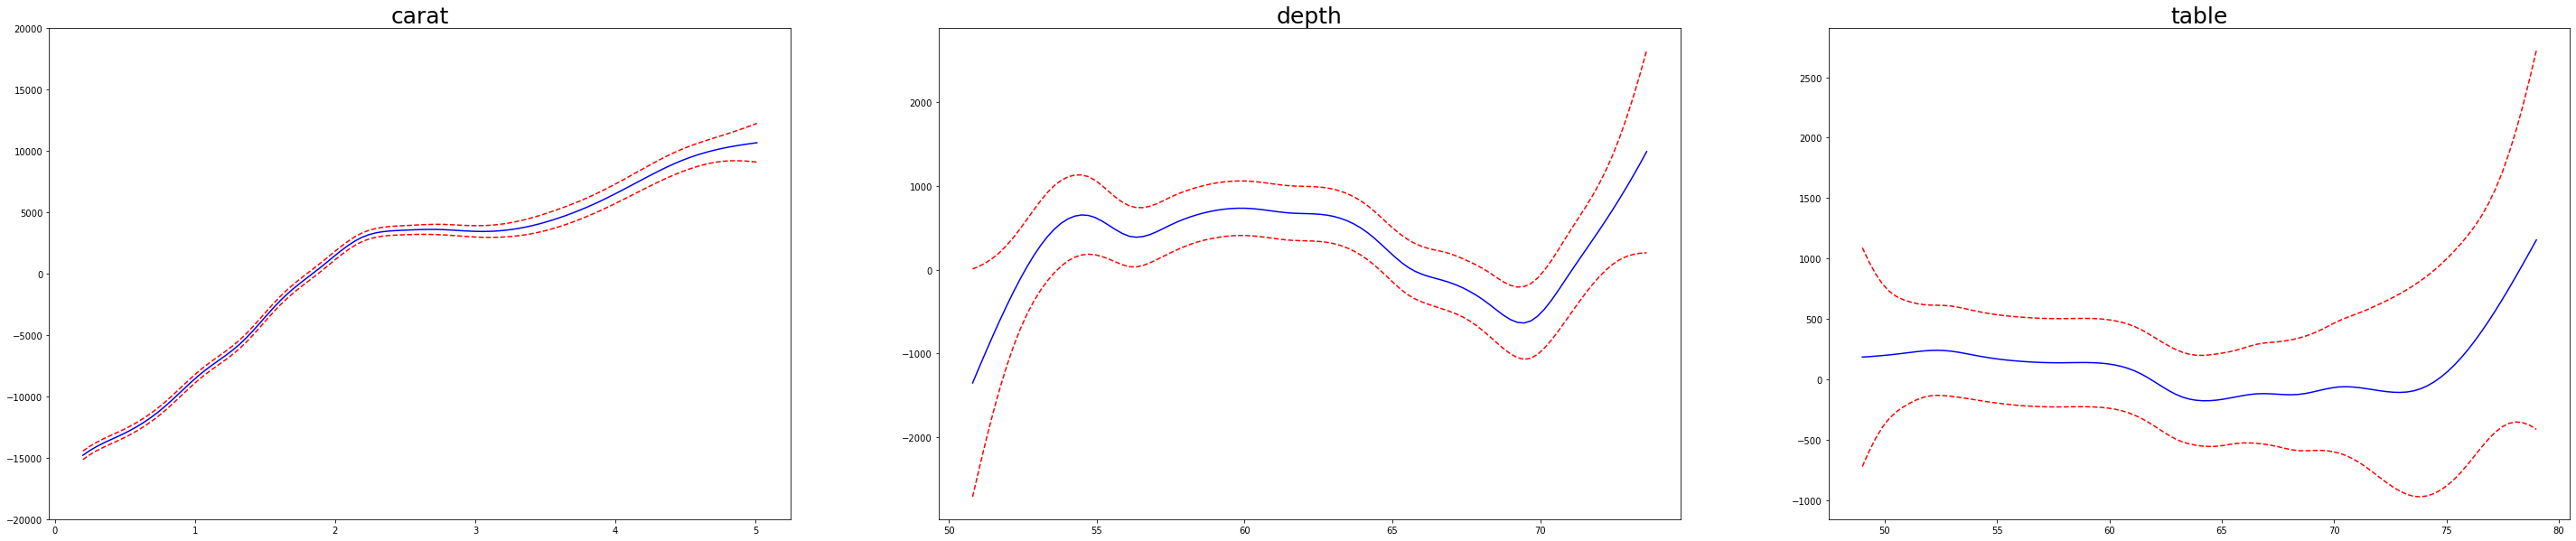

In [113]:
titles = X.columns[0:3]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(50, 10))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color = "blue")
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=0.95)[1], color ='red', ls='--')
    if i == 0:
        ax.set_ylim(-20000,20000)
    ax.set_title(titles[i], fontsize = 25)

### GAM decreasing the n_splines to better inspect the relationships btw response and covariates

In [114]:
n_splines = [5, 4, 6, 5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
len(n_splines)

23

In [115]:
lam = 0.0631
gam2 = LinearGAM(lam = lam, n_splines=n_splines).fit(X_train_array, Y_train_array)
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.9796
Link Function:                     IdentityLink Log Likelihood:                               -640672.4931
Number of Samples:                        43126 AIC:                                          1281400.9454
                                                AICc:                                          1281400.983
                                                GCV:                                          1130326.3385
                                                Scale:                                        1129053.5733
                                                Pseudo R-Squared:                                   0.9288
Feature Function                  Lam

In [116]:
predictions=gam2.predict(X_test_array)
print("Accuracy: {} ".format(r2_score(Y_test_array, predictions)))

Accuracy: 0.9300990440301424 


<Figure size 432x288 with 0 Axes>

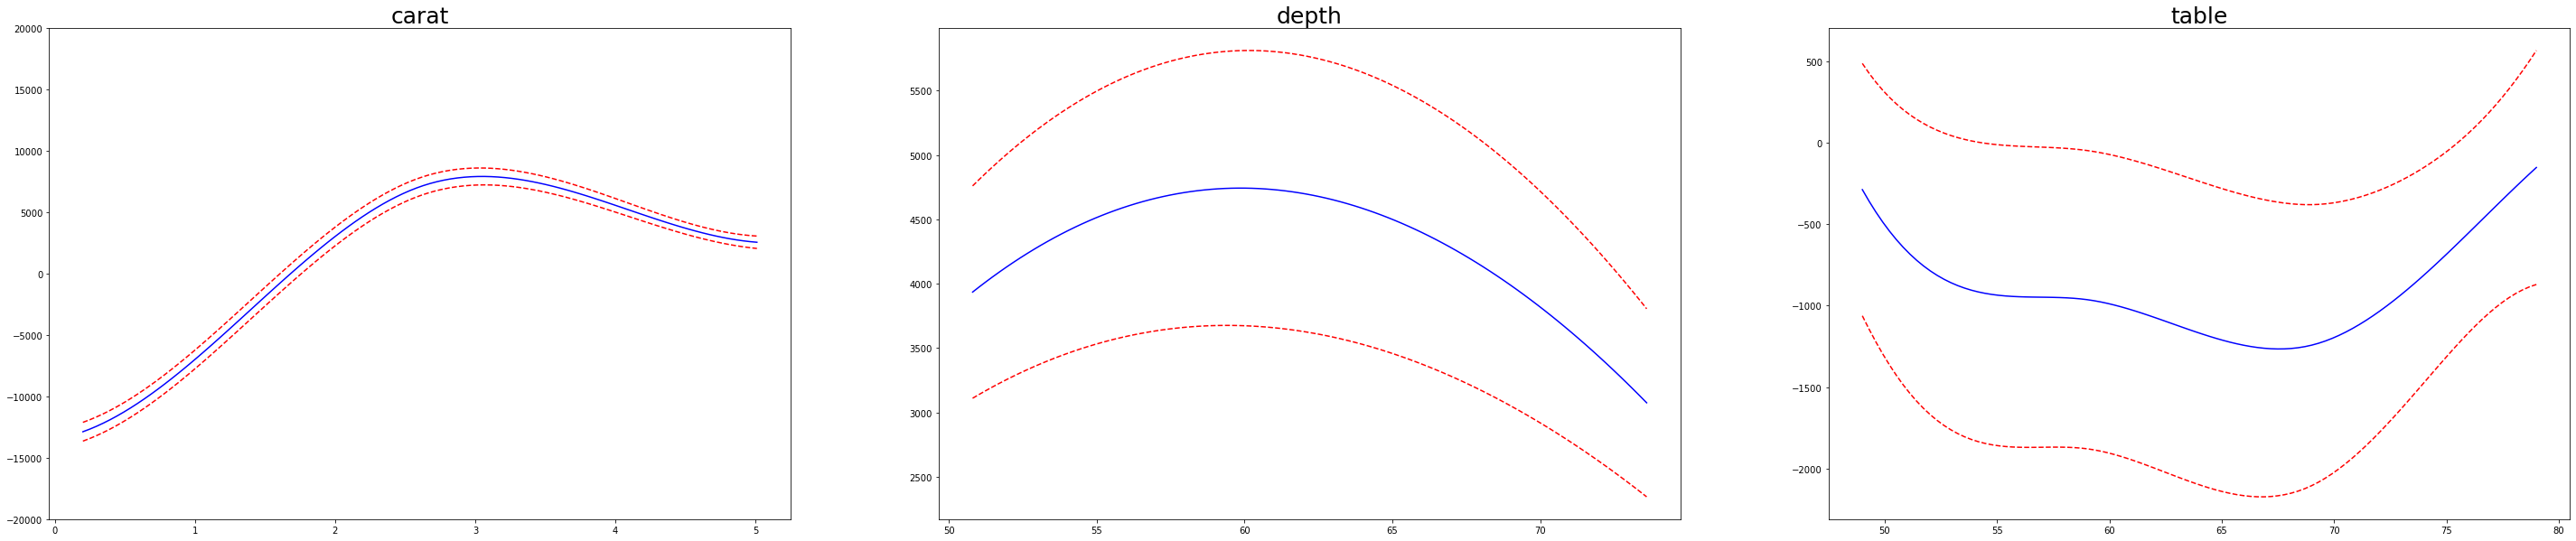

In [117]:
titles = X.columns[0:3]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(50, 10))
for i, ax in enumerate(axs):
    XX = gam2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX), color = "blue")
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX,   width=0.95)[1], color='red', ls='--')
    if i == 0:
        ax.set_ylim(-20000,20000)
    ax.set_title(titles[i], fontsize = 25)

In [118]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### Other regressions

In [119]:
from sklearn.preprocessing import LabelEncoder

label_cut = LabelEncoder()
diamonds['cut'] = label_cut.fit_transform(diamonds['cut'])

label_color = LabelEncoder()
diamonds['color'] = label_color.fit_transform(diamonds['color'])

label_clarity = LabelEncoder()
diamonds['clarity'] = label_clarity.fit_transform(diamonds['clarity'])

diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [120]:
from sklearn.model_selection import train_test_split
X = diamonds.drop(['price','volume'], axis=1)
Y = diamonds['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=66)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (43126, 6)
X_test: (10782, 6)
Y_train: (43126,)
Y_test: (10782,)


### Regression tree

In [121]:
reg_tree = DecisionTreeRegressor()
parameters={"max_depth" : [i for i in range (10,14)],
           "min_samples_leaf":[i for i in range (8,11)],
           "min_samples_split":[20,50]}

tuning_model=GridSearchCV(reg_tree,param_grid=parameters,cv=10)

reg_tree_tuned = tuning_model.fit(X_train, Y_train)
best_reg_tree = reg_tree_tuned.best_estimator_
best_reg_tree

DecisionTreeRegressor(max_depth=12, min_samples_leaf=8, min_samples_split=20)

In [122]:
Y_pred_rt = best_reg_tree.predict(X_test)

mse_test_rt = math.sqrt(mean_squared_error(Y_test, Y_pred_rt))
R2_test_rt= r2_score(Y_test, Y_pred_rt)

print("TEST SET")
print("Mean Squared Error:", mse_test_rt)
print("R-squared:", R2_test_rt)

TEST SET
Mean Squared Error: 591.3191105056793
R-squared: 0.9783401487612009


### Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
parameters={"max_depth" : [i for i in range (10,14)],
           "min_samples_leaf":[i for i in range (8,11)],
           "min_samples_split":[20,50]}

tuning_model=GridSearchCV(rf_reg, param_grid=parameters, cv=10)

rf_reg_tuned = tuning_model.fit(X_train, Y_train)
best_rf_reg = rf_reg_tuned.best_estimator_
best_rf_reg

RandomForestRegressor(max_depth=13, min_samples_leaf=8, min_samples_split=20)

In [124]:
Y_pred_rfr = best_rf_reg.predict(X_test)

mse_test_rfr = math.sqrt(mean_squared_error(Y_test, Y_pred_rfr))
R2_test_rfr = r2_score(Y_test, Y_pred_rfr)

print("TEST SET")
print("Mean Squared Error:", mse_test_rfr)
print("R-squared:", R2_test_rfr)

TEST SET
Mean Squared Error: 551.4119491733094
R-squared: 0.9811650710688975


### Gradient Boosting Regressor

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
GB_reg = GradientBoostingRegressor()

parameters={"learning_rate":[0.01,0.05,0.1,0.2],
           "max_depth":[i for i in range(7,10)]} #>2 because we have collinearities

tuning_model = GridSearchCV(GB_reg,param_grid=parameters,cv=10)

GB_reg_tuned = tuning_model.fit(X_train, Y_train)
best_GB_reg = GB_reg_tuned.best_estimator_
best_GB_reg

GradientBoostingRegressor(max_depth=7)

In [126]:
Y_pred_gbr = best_GB_reg.predict(X_test)

mse_test_gbr = math.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
R2_test_gbr = r2_score(Y_test, Y_pred_gbr)

print("TEST SET")
print("Mean Squared Error:", mse_test_gbr)
print("R-squared:", R2_test_gbr)

TEST SET
Mean Squared Error: 509.8930668892427
R-squared: 0.9838946616444488


### XG Boost

In [127]:
from xgboost import XGBRegressor
XGB_reg =XGBRegressor()

parameters={"learning_rate":[0.01,0.05,0.1,0.2],
           "max_depth":[i for i in range (7,10)]} #2 because we have collinearities

tuning_model = GridSearchCV(XGB_reg,param_grid=parameters,cv=10)

XGB_reg_tuned = tuning_model.fit(X_train, Y_train)
best_XGB_reg = XGB_reg_tuned.best_estimator_
best_XGB_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
Y_pred_xgb = best_XGB_reg.predict(X_test)

mse_test_xgb = math.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
R2_test_xgb = r2_score(Y_test, Y_pred_xgb)

print("TEST SET")
print("Mean Squared Error:", mse_test_xgb)
print("R-squared:", R2_test_xgb)

TEST SET
Mean Squared Error: 511.2135953698478
R-squared: 0.9838111339446756


In [174]:
res_reg = {'R2':[R2_lr, R2_gam, R2_test_rt, R2_test_rfr, R2_test_gbr, R2_test_xgb],
          'sqrt MSE':[mse_lr, mse_gam, mse_test_rt, mse_test_rfr, mse_test_gbr, mse_test_xgb]}

reg_results = pd.DataFrame(data = res_reg, index = ["LinReg", "Gam", "RegTree", "RFreg", "GBreg", "XGB_reg"])
reg_results.head(6)

,R2,sqrt MSE
LinReg,0.916163,1163.357634
Gam,0.932467,1044.126018
RegTree,0.978340,591.319111
RFreg,0.981165,551.411949
GBreg,0.983895,509.893067
XGB_reg,0.983811,511.213595


# Unsupervised method for classification

In [51]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [52]:
diam_clustering = diamonds.drop(diamonds[["price","cut","color","clarity"]],axis=1)
diam_clustering.head()

,carat,depth,table,volume
0,0.23,61.5,55.0,38.202030
1,0.21,59.8,61.0,34.505856
2,0.23,56.9,65.0,38.076885
3,0.29,62.4,58.0,46.724580
4,0.31,63.3,58.0,51.917250


In [53]:
from sklearn.preprocessing import StandardScaler
x = diam_clustering.values
x = StandardScaler().fit_transform(x)

In [54]:
np.mean(x),np.std(x)

(-4.054369398230445e-16, 0.9999999999999999)

### KMeans

In [55]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

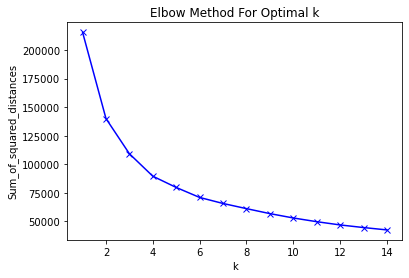

In [56]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The plot does not suggest an evident number of clusters. But, after some efforts and after checking the classification models performances with different number of classes associated with the response, I decided to use 3 clusters, in order to firsly get quite good perfomances but at the same time to have a clear distinction levels for the price (low, medium and high).

Now let's check the most important covariates through Principal Component Analysis

### Principal Component Analysis

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

pca.explained_variance_ratio_ 

array([5.14981504e-01, 3.17861210e-01, 1.66964178e-01, 1.93108465e-04])

In [58]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels= ['PC'+str(i) for i in range(1, len(per_var)+1)]
per_var

array([51.5, 31.8, 16.7,  0. ])

<AxesSubplot:>

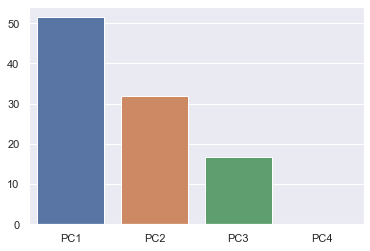

In [59]:
import seaborn as sns
sns.set()
sns.barplot(x=labels,y=per_var)

Text(0.5, 0, 'Principal Components')

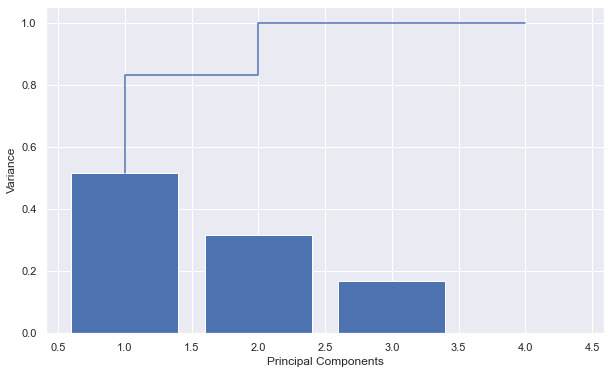

In [60]:
plt.figure(figsize=(10,6))
plt.step(range(1, len(per_var)+1),np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(1, len(per_var)+1), pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Principal Components")

In [61]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
X = pca.fit_transform(x)

In [62]:
##Loadings for each principal component that we keep 
loading_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'], 
                              index = diam_clustering.columns)
loading_matrix

,PC1,PC2,PC3,PC4
carat,0.685981,-0.138925,-0.092659,0.708198
depth,-0.042271,-0.739222,0.671940,-0.016151
table,0.241065,0.645304,0.724793,-0.012085
volume,0.685223,-0.133545,-0.120773,-0.705726


<AxesSubplot:title={'center':'Loadings in PC1'}>

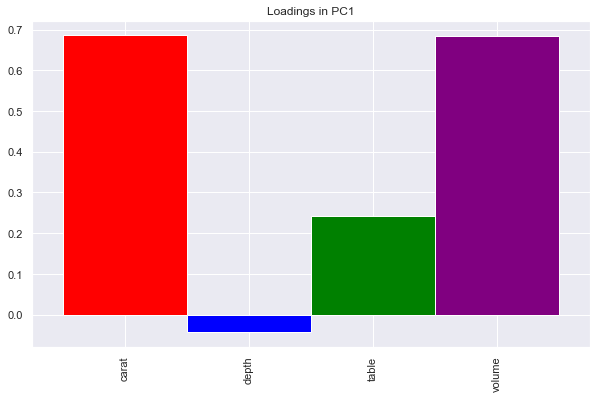

In [63]:
colors = ["red","blue","green","purple","orange","brown","pink","gray","yellow","cyan","black"]
plt.figure(figsize=(10,6))
plt.title("Loadings in PC1")
loading_matrix['PC1'].plot.bar(width = 1,color = colors)

As expected, the 2 most important variable are carat and volume. Since I want a model that is as simple as possible, I decided to keep only the carat variable. Moreover, I kept the categorical variable color, because is the most "visible" variable to a quick evaluation of the diamond 

# CLASSIFICATION

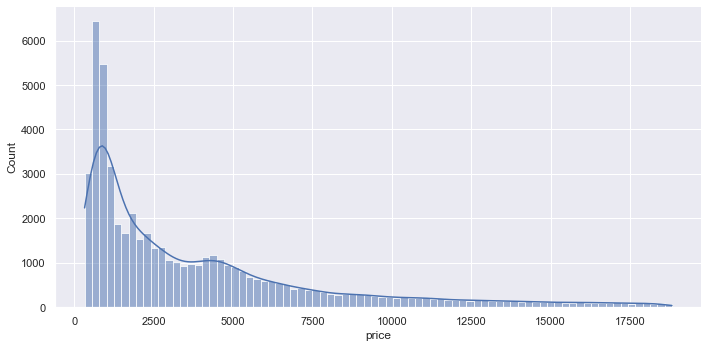

In [64]:
import seaborn as sns
import matplotlib.pyplot
sns.displot(diamonds.price, kde = True, aspect = 2)

In [65]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [26]:
diamonds_cl = diamonds.copy()
diamonds_cl['price'] = pd.qcut(diamonds_cl.price, 3, labels=[1,2,3])
diamonds_cl.head(-20)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,1,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,1,34.505856
2,0.23,Good,E,VS1,56.9,65.0,1,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,1,46.724580
4,0.31,Good,J,SI2,63.3,58.0,1,51.917250
...,...,...,...,...,...,...,...,...
53915,0.77,Ideal,E,SI2,62.1,56.0,2,124.227312
53916,0.74,Good,D,SI1,63.1,59.0,2,118.319194
53917,0.90,Very Good,J,SI1,63.2,60.0,2,143.865288
53918,0.76,Premium,I,VS1,59.3,62.0,2,121.069845


In [27]:
diamonds_cl.price.value_counts()

1    17995
3    17968
2    17945
Name: price, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
label_cut = LabelEncoder()
diamonds_cl['cut'] = label_cut.fit_transform(diamonds['cut'])

label_color = LabelEncoder()
diamonds_cl['color'] = label_color.fit_transform(diamonds['color'])

label_clarity = LabelEncoder()
diamonds_cl['clarity'] = label_clarity.fit_transform(diamonds['clarity'])

diamonds_cl.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,1,38.202030
1,0.21,3,1,2,59.8,61.0,1,34.505856
2,0.23,1,1,4,56.9,65.0,1,38.076885
3,0.29,3,5,5,62.4,58.0,1,46.724580
4,0.31,1,6,3,63.3,58.0,1,51.917250


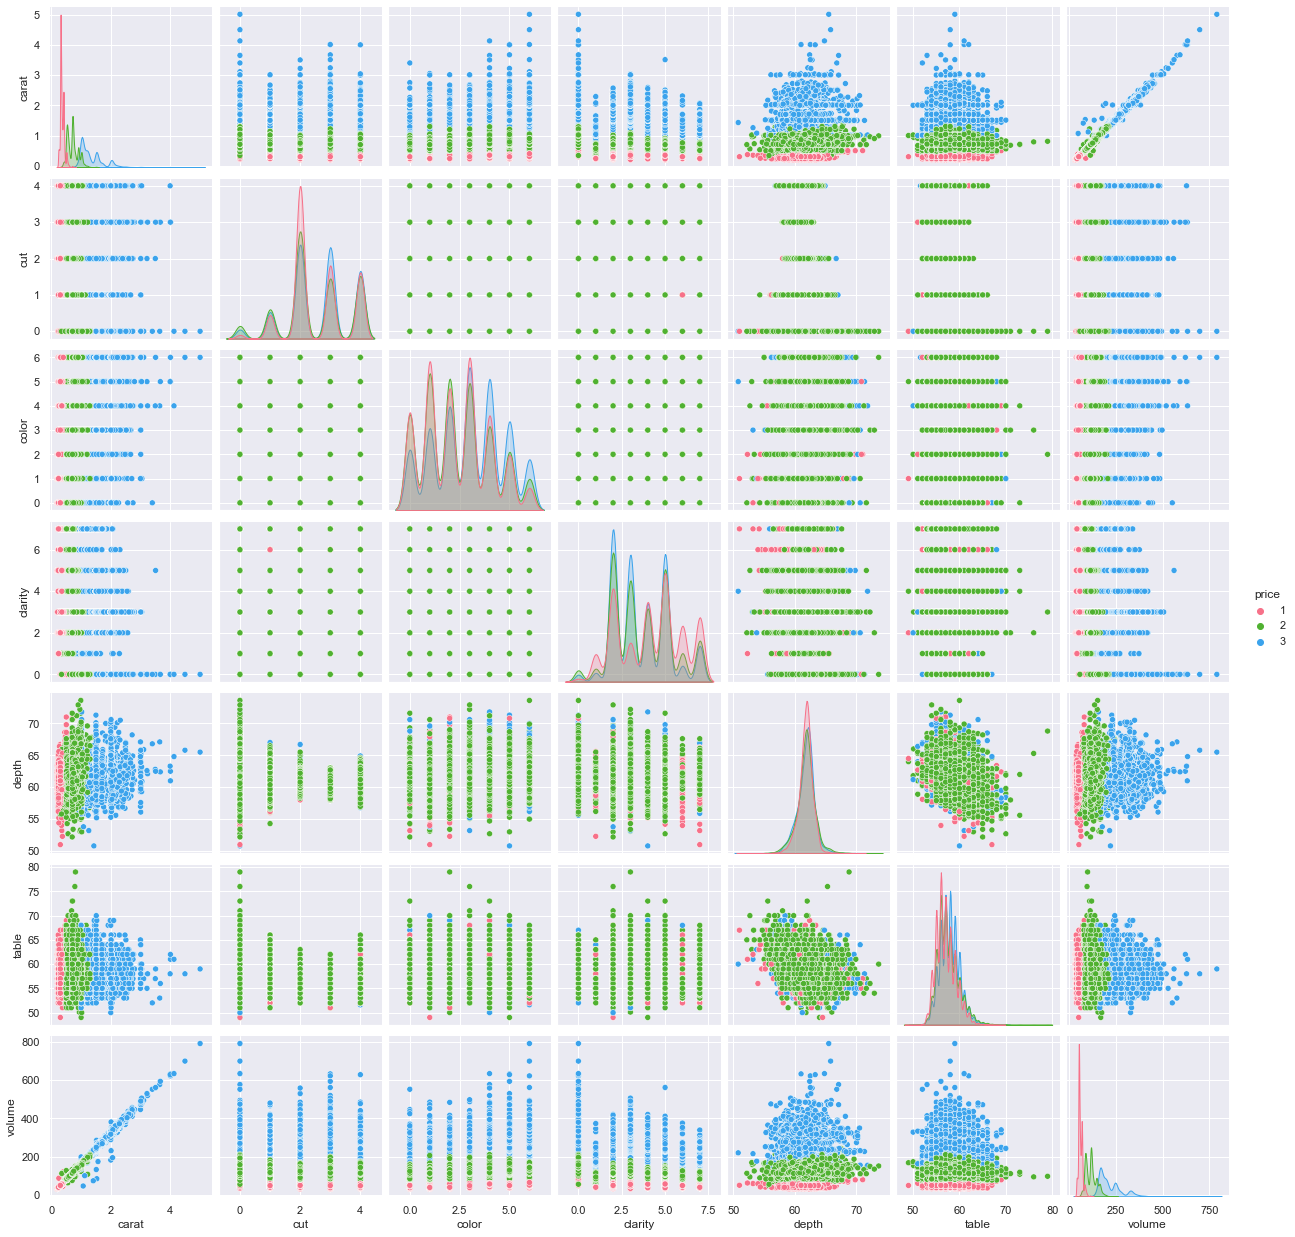

In [69]:
sns.pairplot(diamonds_cl, hue='price', hue_order=[1,2,3], palette='husl')

In [29]:
diam_2cov = diamonds_cl[["price","volume","color"]]
diam_2cov.head(-20)

,price,volume,color
0,1,38.202030,1
1,1,34.505856,1
2,1,38.076885,1
3,1,46.724580,5
4,1,51.917250,6
...,...,...,...
53915,2,124.227312,1
53916,2,118.319194,0
53917,2,143.865288,6
53918,2,121.069845,5


<AxesSubplot:xlabel='color', ylabel='volume'>

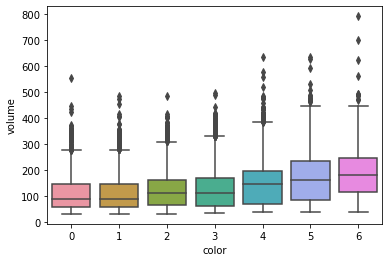

In [30]:
sns.boxplot(data=diam_2cov, x="color", y="volume")

Train and Test set for other classification models

In [31]:
from sklearn.model_selection import train_test_split

X = diam_2cov[['volume','color']]
Y = diam_2cov[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=66)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (43126, 2)
X_test: (10782, 2)
Y_train: (43126, 1)
Y_test: (10782, 1)


### KNN

Train set and test set for KNN 

In [34]:
#Selecting only numerical covariate and standardizing (knn is not scale invariant)
from sklearn.preprocessing import StandardScaler
diam_knn = diam_2cov[["price", "volume"]]
diam_knn_std = StandardScaler().fit_transform(diam_knn[["volume"]])
print(np.mean(diam_knn_std),np.std(diam_knn_std))

4.217809517014767e-17 1.0


In [35]:
diam_knn.head()

,price,volume
0,1,38.202030
1,1,34.505856
2,1,38.076885
3,1,46.724580
4,1,51.917250


In [36]:
diam_knn["volume"] = diam_knn_std

In [37]:
diam_knn.head()

,price,volume
0,1,-1.198128
1,1,-1.246476
2,1,-1.199765
3,1,-1.086648
4,1,-1.018725


In [38]:
X_knn = diam_knn[["volume"]]
Y_knn = diam_knn[['price']]

X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X_knn,Y_knn,test_size=0.2, random_state=66)
print("X_train:", X_train_knn.shape)
print("X_test:", X_test_knn.shape)
print("Y_train:", Y_train_knn.shape)
print("Y_test:", Y_test_knn.shape)

X_train: (43126, 1)
X_test: (10782, 1)
Y_train: (43126, 1)
Y_test: (10782, 1)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[2,4,5,10,20,30,50,60,70,80,100]}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn , param_grid = parameters, cv = 5)

best_KNN = grid_search.fit(X_train_knn,Y_train_knn)
best_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=100)

In [40]:
Y_pred_knn = best_KNN.predict(X_test_knn)

mse_test_knn = mean_squared_error(Y_test_knn, Y_pred_knn)
accuracy_knn = accuracy_score(Y_test_knn, Y_pred_knn)
print("TEST SET")
print("Mean Squared Error:", mse_test_knn)
print("Accuracy:", accuracy_knn)

TEST SET
Mean Squared Error: 0.0874605824522352
Accuracy: 0.9125394175477648


Text(33.0, 0.5, 'True label')

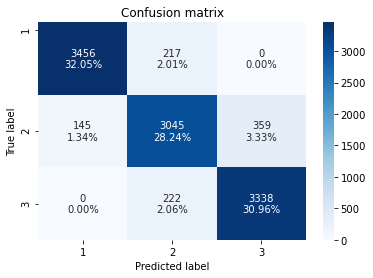

In [41]:
import numpy as np
cm_knn = confusion_matrix(Y_test_knn,Y_pred_knn)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_knn, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=[1,2,3])
plt.yticks([0.1,1.5,2.5],labels=[1,2,3])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [42]:
sensitivity_knn_1= cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1]+cm_knn[0,2])
print('Sensitivity LOW: ', sensitivity_knn_1)

sensitivity_knn_2 = cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1]+cm_knn[1,2])
print('Sensitivity MEDIUM : ', sensitivity_knn_2)

sensitivity_knn_3 = cm_knn[2,2]/(cm_knn[2,0]+cm_knn[2,1]+cm_knn[2,2])
print('Sensitivity HIGH : ', sensitivity_knn_3)

Sensitivity LOW:  0.9409202286958889
Sensitivity MEDIUM :  0.8579881656804734
Sensitivity HIGH :  0.9376404494382022


In [43]:
Y_score_knn = best_KNN.predict_proba(X_test_knn)
auc_knn = roc_auc_score(Y_test_knn, Y_score_knn, multi_class = 'ovr')
auc_knn

0.9786001063652652

### Support Vector Classifier

In [46]:
svc = svm.SVC()
svc.fit(X_train_knn, Y_train_knn)

SVC()

In [47]:
pred = svc.predict(X_test_knn)
acc = accuracy_score(Y_test_knn, pred)
acc

0.9126321647189761

In [53]:
from sklearn import svm
parameters= {'C':[0.1,0.5,1,2]}

svc = svm.SVC(probability = True) 
grid_search = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5)

best_SVC = grid_search.fit(X_train_knn,Y_train_knn)
best_SVC.best_estimator_

SVC(C=2, probability=True)

In [54]:
Y_pred_svc = best_SVC.predict(X_test_knn)

mse_test_svc = mean_squared_error(Y_test_knn, Y_pred_svc)
accuracy_svc = accuracy_score(Y_test_knn, Y_pred_svc)
print("TEST SET")
print("Mean Squared Error:", mse_test_svc)
print("Accuracy:", accuracy_svc)

TEST SET
Mean Squared Error: 0.08736783528102393
Accuracy: 0.9126321647189761


Text(33.0, 0.5, 'True label')

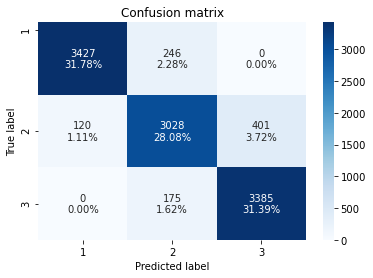

In [55]:
import numpy as np
cm_svc = confusion_matrix(Y_test,Y_pred_svc)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svc.flatten()/np.sum(cm_svc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_svc, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=[1,2,3])
plt.yticks([0.1,1.5,2.5],labels=[1,2,3])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [56]:
sensitivity_svc_1= cm_svc[0,0]/(cm_svc[0,0]+cm_svc[0,1]+cm_svc[0,2])
print('Sensitivity LOW: ', sensitivity_svc_1)

sensitivity_svc_2 = cm_svc[1,1]/(cm_svc[1,0]+cm_svc[1,1]+cm_svc[1,2])
print('Sensitivity MEDIUM : ', sensitivity_svc_2)

sensitivity_svc_3 = cm_svc[2,2]/(cm_svc[2,0]+cm_svc[2,1]+cm_svc[2,2])
print('Sensitivity HIGH : ', sensitivity_svc_3)

Sensitivity LOW:  0.9330247753879662
Sensitivity MEDIUM :  0.8531980839673148
Sensitivity HIGH :  0.9508426966292135


In [57]:
Y_score_svc = best_SVC.predict_proba(X_test_knn)
auc_svc = roc_auc_score(Y_test_knn, Y_score_svc, multi_class = 'ovr')
auc_svc

0.9761355746066758

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
parameters={"max_depth" : [i for i in range (2,5)],
           "min_samples_leaf":[i for i in range (10,20)],
           "min_samples_split":[100,200,300,500]}

tuning_model = GridSearchCV(dec_tree,param_grid=parameters,cv=10)

dec_tree_tuned = tuning_model.fit(X_train, Y_train)
best_tree = dec_tree_tuned.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=300)

In [59]:
Y_pred_dt = best_tree.predict(X_test)

mse_test_dt = mean_squared_error(Y_test, Y_pred_dt)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print("TEST SET")
print("Mean Squared Error:", mse_test_dt)
print("Accuracy:", accuracy_dt)

TEST SET
Mean Squared Error: 0.08375069560378408
Accuracy: 0.9162493043962159


Text(33.0, 0.5, 'True label')

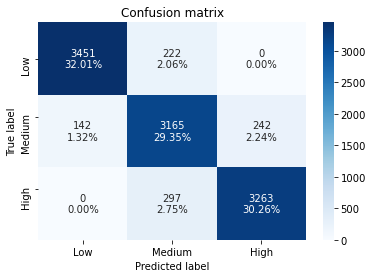

In [60]:
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_dt, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [61]:
sensitivity_dt_1= cm_dt[0,0]/(cm_dt[0,0]+cm_dt[0,1]+cm_dt[0,2])
print('Sensitivity LOW: ', sensitivity_dt_1)

sensitivity_dt_2 = cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1]+cm_dt[1,2])
print('Sensitivity MEDIUM : ', sensitivity_dt_2)

sensitivity_dt_3 = cm_dt[2,2]/(cm_dt[2,0]+cm_dt[2,1]+cm_dt[2,2])
print('Sensitivity HIGH : ', sensitivity_dt_3)

Sensitivity LOW:  0.9395589436427988
Sensitivity MEDIUM :  0.8918005071851226
Sensitivity HIGH :  0.9165730337078651


In [62]:
Y_score_dt = best_tree.predict_proba(X_test)
auc_dt = roc_auc_score(Y_test, Y_score_dt, multi_class = 'ovr')
auc_dt

0.9770486126789555

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier()
parameters={"n_estimators":[80,100],
           "max_depth" : [i for i in range (2,5)],
           "min_samples_leaf":[i for i in range (10,20)],
           "min_samples_split":[100,200,300,500]}

tuning_model = GridSearchCV(rf_cl, param_grid=parameters, cv=10)

rf_cl_tuned = tuning_model.fit(X_train, Y_train)
best_rf_cl = rf_cl_tuned.best_estimator_
best_rf_cl

RandomForestClassifier(max_depth=4, min_samples_leaf=13, min_samples_split=200,
                       n_estimators=80)

In [64]:
Y_pred_rfc = best_rf_cl.predict(X_test)

mse_test_rfc = mean_squared_error(Y_test, Y_pred_rfc)
accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)
print("TEST SET")
print("Mean Squared Error:", mse_test_rfc)
print("Accuracy:", accuracy_rfc)

TEST SET
Mean Squared Error: 0.08189575217955852
Accuracy: 0.9181042478204414


Text(33.0, 0.5, 'True label')

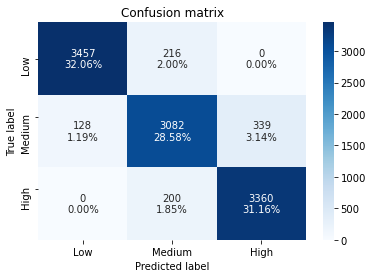

In [65]:
cm_rfc = confusion_matrix(Y_test,Y_pred_rfc)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rfc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rfc.flatten()/np.sum(cm_rfc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_rfc, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [66]:
sensitivity_rfc_1= cm_rfc[0,0]/(cm_rfc[0,0]+cm_rfc[0,1]+cm_rfc[0,2])
print('Sensitivity LOW: ', sensitivity_rfc_1)

sensitivity_rfc_2 = cm_rfc[1,1]/(cm_rfc[1,0]+cm_rfc[1,1]+cm_rfc[1,2])
print('Sensitivity MEDIUM : ', sensitivity_rfc_2)

sensitivity_rfc_3 = cm_rfc[2,2]/(cm_rfc[2,0]+cm_rfc[2,1]+cm_rfc[2,2])
print('Sensitivity HIGH : ', sensitivity_rfc_3)

Sensitivity LOW:  0.9411924857065069
Sensitivity MEDIUM :  0.8684136376444068
Sensitivity HIGH :  0.9438202247191011


In [67]:
Y_score_rfc = best_rf_cl.predict_proba(X_test)
auc_rfc = roc_auc_score(Y_test, Y_score_rfc, multi_class = 'ovr')
auc_rfc

0.9756635723971906

### Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
GB_cl = GradientBoostingClassifier()

parameters={"learning_rate":[0.01,0.05,0.1,0.2],
           "max_depth":[i for i in range(5,10)]} #>2 because we have collinearities

tuning_model = GridSearchCV(GB_cl,param_grid=parameters,cv=5)

GB_cl_tuned = tuning_model.fit(X_train, Y_train)
best_GB_cl = GB_cl_tuned.best_estimator_
best_GB_cl

GradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [69]:
Y_pred_gbc = best_GB_cl.predict(X_test)

mse_test_gbc = mean_squared_error(Y_test, Y_pred_gbc)
accuracy_gbc = accuracy_score(Y_test, Y_pred_gbc)
print("TEST SET")
print("Mean Squared Error:", mse_test_gbc)
print("Accuracy:", accuracy_gbc)

TEST SET
Mean Squared Error: 0.07707289927657207
Accuracy: 0.922927100723428


Text(33.0, 0.5, 'True label')

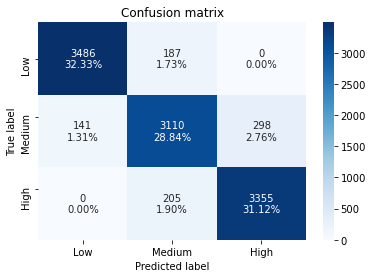

In [70]:
cm_gbc = confusion_matrix(Y_test,Y_pred_gbc)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_gbc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gbc.flatten()/np.sum(cm_gbc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_gbc, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [71]:
sensitivity_gbc_1= cm_gbc[0,0]/(cm_gbc[0,0]+cm_gbc[0,1]+cm_gbc[0,2])
print('Sensitivity LOW: ', sensitivity_gbc_1)

sensitivity_gbc_2 = cm_gbc[1,1]/(cm_gbc[1,0]+cm_gbc[1,1]+cm_gbc[1,2])
print('Sensitivity MEDIUM : ', sensitivity_gbc_2)

sensitivity_gbc_3 = cm_gbc[2,2]/(cm_gbc[2,0]+cm_gbc[2,1]+cm_gbc[2,2])
print('Sensitivity HIGH : ', sensitivity_gbc_3)

Sensitivity LOW:  0.9490879390144297
Sensitivity MEDIUM :  0.8763031839954917
Sensitivity HIGH :  0.9424157303370787


In [72]:
Y_score_gbc = best_GB_cl.predict_proba(X_test)
auc_gbc = roc_auc_score(Y_test, Y_score_gbc, multi_class = 'ovr')
auc_gbc

0.9842005375825801

### XGBoost Classifier

In [73]:
from xgboost import XGBClassifier
XGB_cl =XGBClassifier()

parameters={"learning_rate":[0.01,0.05,0.1,0.2],
           "max_depth":[i for i in range (5,10)]} #2 because we have collinearities

tuning_model = GridSearchCV(XGB_cl,param_grid=parameters,cv=5)

XGB_cl_tuned = tuning_model.fit(X_train, Y_train)
best_XGB_cl = XGB_cl_tuned.best_estimator_
best_XGB_cl

[11:37:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[11:40:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:41:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[11:44:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:44:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:44:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:44:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[11:48:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:48:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
Y_pred_xgbc = best_XGB_cl.predict(X_test)

mse_test_xgbc = mean_squared_error(Y_test, Y_pred_xgbc)
accuracy_xgbc = accuracy_score(Y_test, Y_pred_xgbc)
print("TEST SET")
print("Mean Squared Error:", mse_test_xgbc)
print("Accuracy:", accuracy_xgbc)

TEST SET
Mean Squared Error: 0.07614542756445929
Accuracy: 0.9238545724355407


Text(33.0, 0.5, 'True label')

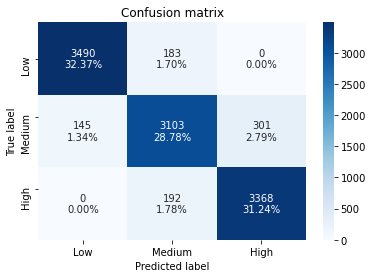

In [75]:
cm_xgbc = confusion_matrix(Y_test,Y_pred_xgbc)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgbc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgbc.flatten()/np.sum(cm_xgbc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm_xgbc, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [76]:
sensitivity_xgbc_1= cm_xgbc[0,0]/(cm_xgbc[0,0]+cm_xgbc[0,1]+cm_xgbc[0,2])
print('Sensitivity LOW: ', sensitivity_xgbc_1)

sensitivity_xgbc_2 = cm_xgbc[1,1]/(cm_xgbc[1,0]+cm_xgbc[1,1]+cm_xgbc[1,2])
print('Sensitivity MEDIUM : ', sensitivity_xgbc_2)

sensitivity_xgbc_3 = cm_xgbc[2,2]/(cm_xgbc[2,0]+cm_xgbc[2,1]+cm_xgbc[2,2])
print('Sensitivity HIGH : ', sensitivity_xgbc_3)

Sensitivity LOW:  0.9501769670569017
Sensitivity MEDIUM :  0.8743307974077205
Sensitivity HIGH :  0.946067415730337


In [77]:
Y_score_xgb = best_XGB_cl.predict_proba(X_test)
auc_xgb = roc_auc_score(Y_test, Y_score_xgb, multi_class = 'ovr')
auc_xgb

0.9845713983776404

In [79]:
cl_res = {"Accuracy":[accuracy_knn, accuracy_svc, accuracy_dt, accuracy_rfc, accuracy_gbc, accuracy_xgbc],
         "LOW sensitivity":[sensitivity_knn_1, sensitivity_svc_1, sensitivity_dt_1, sensitivity_rfc_1,
                           sensitivity_gbc_1, sensitivity_xgbc_1],
         "MED sensitivity":[sensitivity_knn_2, sensitivity_svc_2, sensitivity_dt_2, sensitivity_rfc_2,
                           sensitivity_gbc_2, sensitivity_xgbc_2],
         "HIGH sensitivity":[sensitivity_knn_3, sensitivity_svc_3, sensitivity_dt_3, sensitivity_rfc_3,
                            sensitivity_gbc_3, sensitivity_xgbc_3],
         "AUC":[auc_knn, auc_svc, auc_dt, auc_rfc, auc_gbc, auc_xgb]}

class_results = pd.DataFrame(data = cl_res, index = ["KNN","SVC","DecTree", "RFClass","GBClass","XGBClass"])
class_results.head(7)

,Accuracy,LOW sensitivity,MED sensitivity,HIGH sensitivity,AUC
KNN,0.912539,0.940920,0.857988,0.937640,0.978600
SVC,0.912632,0.933025,0.853198,0.950843,0.976136
DecTree,0.916249,0.939559,0.891801,0.916573,0.977049
RFClass,0.918104,0.941192,0.868414,0.943820,0.975664
GBClass,0.922927,0.949088,0.876303,0.942416,0.984201
XGBClass,0.923855,0.950177,0.874331,0.946067,0.984571
